In [1]:
from sklearn.linear_model import LogisticRegression
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.SimulatedAnnealing import SimulatedAnnealing
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.TPEChi2 import TPEChi2
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.SFS import SFS
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.DataLoader import DataLoader
from fastsklearnfeature.interactiveAutoML.new_bench.multiobjective.metalearning.openml_data.notebook.api.QueryOptimizer import QueryOptimizer
import numpy as np
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

In [2]:
dl = DataLoader()
X_train, X_validation, X_test, y_train, y_validation, y_test, feature_names, sensitive_ids = dl.get_data(dataset='Adult')

In [ ]:
sa_nr = SimulatedAnnealing()
sa_nr.query(X_train,
			X_validation,
			X_test,
			y_train,
			y_validation,
			y_test,
			classifier=LogisticRegression(class_weight='balanced'),
			min_accuracy=0.9,
			sensitive_ids=sensitive_ids,
			min_fairness=0.0,
			min_safety=0.0,
			min_privacy=None,
			max_complexity=1.0,
			max_search_time=60,
			feature_names=feature_names
			)

Within 9.718307495117188 seconds, the Optimizer chose to run TPE($\chi^2$)


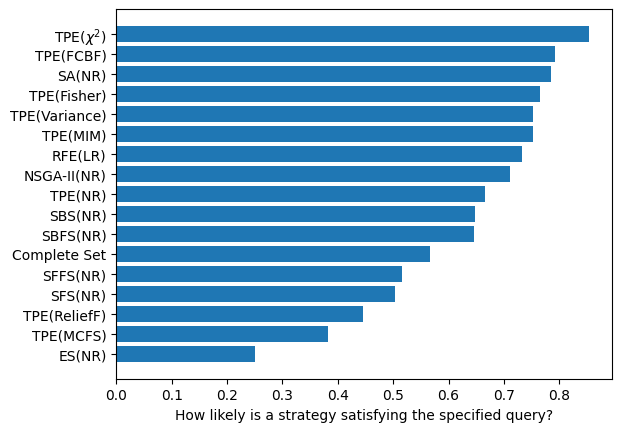

In [3]:
optimizer = QueryOptimizer()
optimizer.get_plan(X_train,
			X_validation,
			X_test,
			y_train,
			y_validation,
			y_test,
			classifier=LogisticRegression(class_weight='balanced'),
			min_accuracy=0.8,
			sensitive_ids=sensitive_ids,
			min_fairness=0.0,
			min_safety=0.0,
			min_privacy=None,
			max_complexity=1.0,
			max_search_time=120,
			feature_names=feature_names
			)

In [4]:
optimizer.explain_prediction()

In [11]:
optimizer.query(X_train,
			X_validation,
			X_test,
			y_train,
			y_validation,
			y_test,
			classifier=LogisticRegression(class_weight='balanced'),
			min_accuracy=0.85,
			sensitive_ids=sensitive_ids,
			min_fairness=0.0,
			min_safety=0.0,
			min_privacy=None,
			max_complexity=0.2,
			max_search_time=600,
			feature_names=feature_names
			)

Within 7.7585227489471436 seconds, the Optimizer chose to run TPE(FCBF)
100%|██████████| 2/2 [00:03<00:00,  1.68s/trial, best loss: 0.0]


array(['education_Masters', 'education_Prof-school',
       'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Own-child', 'relationship_Unmarried', 'sex_Female',
       'sex_Male', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss'], dtype='<U41')

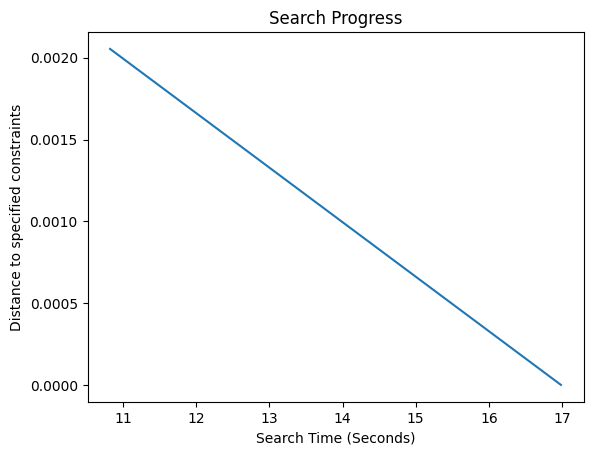

In [12]:
optimizer.get_progress()

In [13]:
fig = optimizer.get_test_radar_chart()
iplot(fig) 